![iam.jpg](attachment:iam.jpg)

# Exercise 13 - 24/01/2023

In [1]:
# For GPU initialization when running on Colab

!pip install tensorflow-gpu==2.11.0

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.11.0 (from versions: 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.11.0


In [2]:
# Importing libraries 

import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout, Input, Add
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras import metrics
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import cifar10

import tensorflow.keras.backend as K
input_shape =  (32,32,1)
from sklearn.model_selection import KFold
plt.rcParams.update({'font.size': 14})

# CIFAR 10 Dataset

### The label data consists of a list of 10,000 numbers ranging from 0 to 9, which corresponds to each of the 10 classes in CIFAR-10.

    airplane : 0
    automobile : 1
    bird : 2
    cat : 3
    deer : 4
    dog : 5
    frog : 6
    horse : 7
    ship : 8
    truck : 9
    


In [3]:
def load_dataset():

  (trainX, trainY), (testX, testY) = cifar10.load_data()

  trainY  =  to_categorical(trainY)
  testY   =  to_categorical(testY)

  return trainX, trainY, testX, testY  

In [4]:
def prep_pixels(trainX, testX):

  trainX = trainX.astype('float32')
  testX  = testX.astype('float32')

  train_X = trainX/trainX.max()
  test_X  = testX/testX.max()

  return train_X, test_X


In [5]:
trainX, trainY, testX, testY  = load_dataset()


170498071/170498071 [==============================] - 1492s 9us/step


In [6]:
def conversion_to_Grayscale(train_X, test_X):

  train_X = np.dot(train_X[:,:,:,:3],[0.299, 0.587, 0.114])
  test_X  = np.dot(test_X[:,:,:,:3],[0.299, 0.587, 0.114]) 


  return train_X, test_X

In [7]:
train_X, test_X               = prep_pixels(trainX, testX)

In [8]:
trainX_g, testX_g             = conversion_to_Grayscale(train_X, test_X)

In [9]:
trainX_g = np.expand_dims(trainX_g, axis=3)
testX_g  = np.expand_dims(testX_g, axis=3)

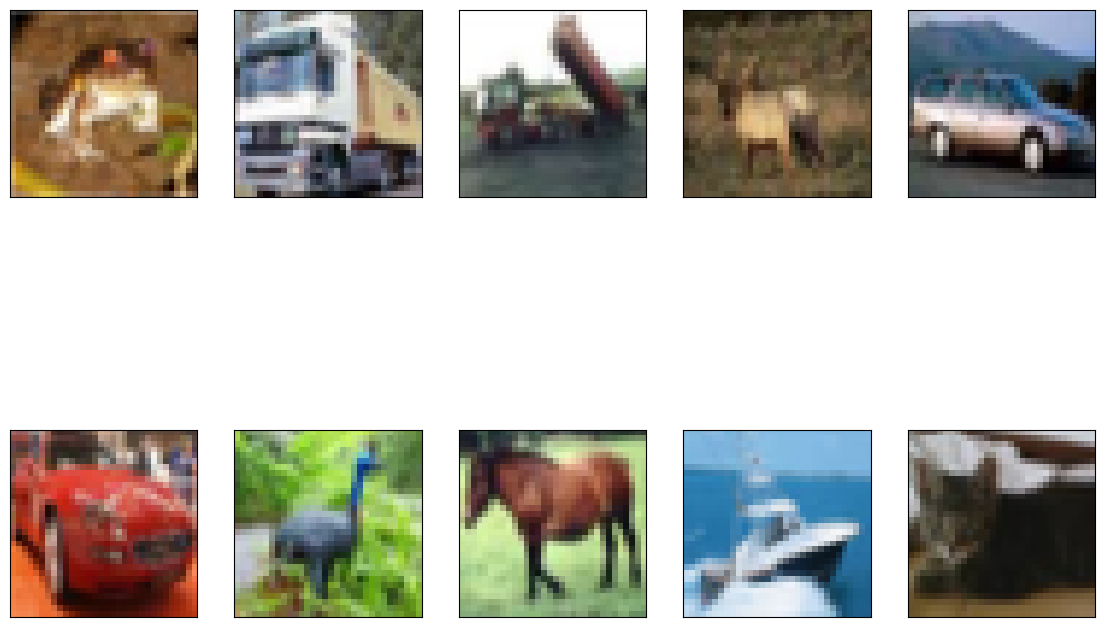

In [10]:
# <Visualising the dataset

plt.figure(figsize=(14,10))
columns = 5
rows    = 2
ix      = 1
count   = 0

for i in range(rows):

  for j in range(columns):

    ax = plt.subplot(rows, columns, ix)
    ax.set_xticks([])
    ax.set_yticks([])

    plt.imshow(train_X[count,:,:,:])
    ix+=1
    count+=1

plt.show()



In [11]:
def define_model():

  model = Sequential()

  model.add(Conv2D(64, (3,3), padding='same', kernel_initializer = 'random_uniform',activation='relu', input_shape=(32,32,1)))
  model.add(MaxPool2D(2,2))

  model.add(Conv2D(64, (3,3), padding='same', kernel_initializer = 'random_uniform',activation='relu'))
  model.add(MaxPool2D(2,2))

  model.add(Conv2D(128, (3,3), padding='same', kernel_initializer = 'random_uniform',activation='relu'))
  model.add(MaxPool2D(2,2))

  model.add(Flatten())

  model.add(Dense(256, activation='relu'))
  model.add(Dense(10, activation='softmax'))


  opt= Adam(0.001)

  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

  return model


In [12]:
model = define_model()

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

In [ ]:
model.fit(trainX_g, trainY, epochs=50, batch_size=64, validation_data=(testX_g, testY), verbose=1)

Epoch 1/50
782/782 [==============================] - 6s 6ms/step - loss: 1.6436 - accuracy: 0.4089 - val_loss: 1.3895 - val_accuracy: 0.5066
Epoch 2/50
782/782 [==============================] - 5s 6ms/step - loss: 1.1975 - accuracy: 0.5810 - val_loss: 1.0835 - val_accuracy: 0.6277
Epoch 3/50
782/782 [==============================] - 5s 6ms/step - loss: 1.0118 - accuracy: 0.6499 - val_loss: 1.0326 - val_accuracy: 0.6461
Epoch 4/50
782/782 [==============================] - 6s 7ms/step - loss: 0.8791 - accuracy: 0.6934 - val_loss: 0.9260 - val_accuracy: 0.6858
Epoch 5/50
782/782 [==============================] - 4s 6ms/step - loss: 0.7788 - accuracy: 0.7306 - val_loss: 0.9027 - val_accuracy: 0.6924
Epoch 6/50
782/782 [==============================] - 4s 6ms/step - loss: 0.7000 - accuracy: 0.7576 - val_loss: 0.8806 - val_accuracy: 0.7052
Epoch 7/50
782/782 [==============================] - 5s 6ms/step - loss: 0.6115 - accuracy: 0.7889 - val_loss: 0.8599 - val_accuracy: 0.7130
Epoch 

In [ ]:
model.predict(testX_g[0:1, :, :, :])

1/1 [==============================] - 0s 145ms/step


array([[6.9772301e-07, 1.2044861e-06, 1.0039923e-04, 7.5908285e-01,
        3.0480095e-07, 3.2292432e-04, 2.8598541e-03, 1.9373278e-01,
        6.3467515e-03, 3.7552204e-02]], dtype=float32)

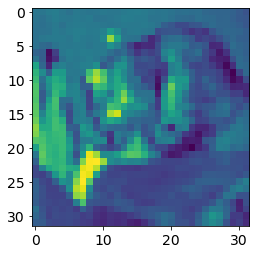

In [ ]:
plt.imshow(testX_g[0, :, :,0])

In [ ]:
testY[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)